In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

## Visualize all with violin plots

### Import the results

In [2]:
filename = "Results2.csv"

names = ["3pHLA-score", "Vina", "Vinardo", "AutoDock", 
         "Dope", "FoldX", "GradDock"]
#ene_fields = ["energy", "pppRF_score", "energy", "energy", "energy", "energy", "energy"]
ba_fields = [ "3pHLA-score", "vina-score", "vinardo-score", "ad4_scoring-score",
             "dope-score", "foldx-score", "graddock-score"]
enef_dict = dict(zip(names, ba_fields))

res = pd.read_csv(filename)
res = res.drop(columns=["Unnamed: 0"])
res["all alleles"] = res["allele"].apply(lambda x:"all alleles")
res = res.dropna()

def get_dope_ene(x):
    tmp = x.strip("()")
    tmp = tmp.split(",")
    return float(tmp[1])
res["dope-score"] = res["dope-score"].apply(get_dope_ene)

def get_gd_ene(x):
    if not x.strip(): 
        return float("nan")
    return float(x)
res["graddock-score"] = res["graddock-score"].apply(get_gd_ene)

res = res.dropna()
res

,allele,peptide,ba,binder,path,allele_type,3pHLA-score,vina-score,vinardo-score,ad4_scoring-score,dope-score,foldx-score,graddock-score,all alleles
0,A0101,QSDFHNNRY,0.574375,1,../../jayvee_data/singleconf/all_data/A0101-QS...,HLA-A,0.547367,-8.96721,-13.34218,-65.69444,1137.351562,6.21831,-82.416,all alleles
1,A0101,NSELLNDRY,0.574375,1,../../jayvee_data/singleconf/all_data/A0101-NS...,HLA-A,0.489661,-8.82455,-12.97415,-57.82088,1233.667480,5.10212,-83.730,all alleles
2,A0101,GSDYINANY,0.574375,1,../../jayvee_data/singleconf/all_data/A0101-GS...,HLA-A,0.505538,-9.25249,-13.69447,-59.29589,1255.735107,3.78880,-87.463,all alleles
3,A0101,IINESLLFY,0.574375,1,../../jayvee_data/singleconf/all_data/A0101-II...,HLA-A,0.341056,-8.98196,-13.89195,-72.75271,1755.264771,8.26256,-65.203,all alleles
4,A0101,LTEYLSTHY,0.574375,1,../../jayvee_data/singleconf/all_data/A0101-LT...,HLA-A,0.503116,-11.77264,-17.36696,-80.29460,1692.102295,-1.85438,-130.770,all alleles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33594,B5701,DEEGQDDKD,1.000000,0,../../rdf_mount/decoymulticonf/confs/B5701-DEE...,decoy,0.128606,-7.23865,-10.24144,-56.88069,392.179077,25.16110,-54.253,all alleles
33595,B5701,SEISAFKTC,1.000000,0,../../rdf_mount/decoymulticonf/confs/B5701-SEI...,decoy,0.100223,-7.01594,-9.49803,-47.69989,1040.530396,9.66123,-43.990,all alleles
33596,B5701,KQKQNRPIP,1.000000,0,../../rdf_mount/decoymulticonf/confs/B5701-KQK...,decoy,0.084480,-6.55047,-9.57565,-54.29282,647.403198,6.81503,-67.177,all alleles
33597,B5701,QLLSGAHWM,1.000000,0,../../rdf_mount/decoymulticonf/confs/B5701-QLL...,decoy,0.085546,-9.05838,-13.64589,-67.04133,1565.069336,-5.19042,-109.216,all alleles


## Violin all

3pHLA-score


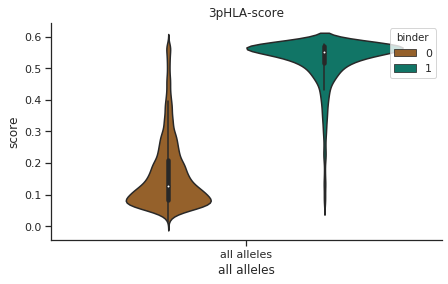

vina-score


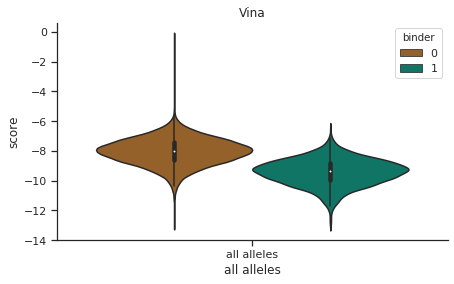

vinardo-score


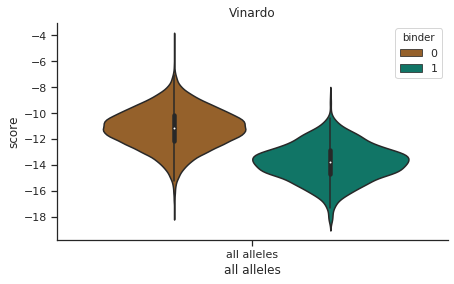

ad4_scoring-score


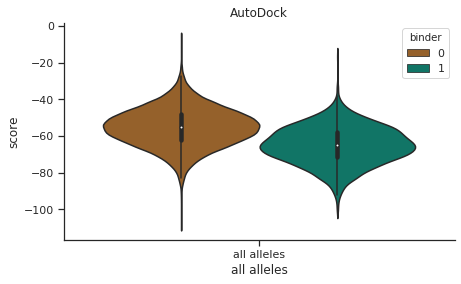

dope-score


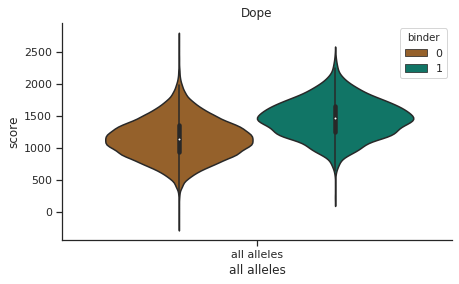

foldx-score


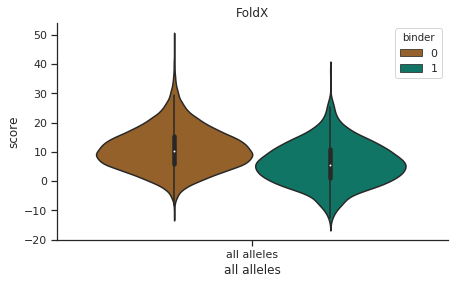

graddock-score


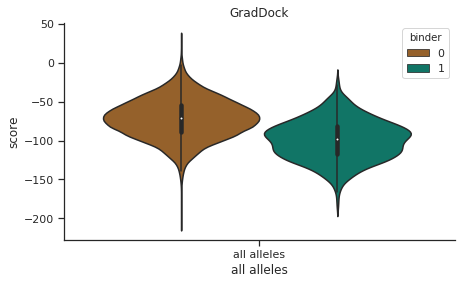

<Figure size 504x288 with 0 Axes>

In [3]:
#these are the cutoffs for outliers
cutofs = [100, 0.7, -3, -3, None, 50, None]
cutofs_dict = dict(zip(ba_fields,cutofs))

for key, ba in enef_dict.items():
    print(ba)
    #if not cutofs_dict[key] is None: df = df[df[ene]<=cutofs_dict[key]]
    sns.set(rc={"figure.figsize": (7,4), "font.family":"Areal"})
    sns.set_style("ticks")
    sns.despine()
    sns.set(rc={"font.family":"Areal"})
    sns.set_style("ticks")
    res_y = res[ba]
    if not cutofs_dict[ba] is None:
        res_y = res_y.apply(lambda x: x if x<cutofs_dict[ba] else float("nan"))
    ax = sns.violinplot(x="all alleles", y=res_y, hue="binder", data=res, palette={0:"#a6611a", 1:"#018571" })
    ax.set(title=key)
    sns.despine()
    sns.set_style("ticks")
    ax.set(ylabel='score', xlabel='all alleles')
    plt.savefig("./figures/fig2-1-"+key+".pdf")
    plt.show()
    plt.clf()

## AUROC AUPRC

In [4]:
# Compute roc stuff
alleles = res["allele"].unique()
results={}
for key, ba in enef_dict.items():
    if ba in ["dope-score", "3pHLA-score"]:    
        sf_pred = list(res[ba])
    else:
        sf_pred = list(-res[ba])
    y_true = list(res["binder"])
    fpr, tpr, _ =roc_curve(y_true, sf_pred)
    roc_auc = auc(fpr, tpr)
    func=key
    results[func]={}
    results[func]["fpr"] = fpr
    results[func]["tpr"] = tpr
    results[func]["auc"] = roc_auc
    print("AUROC ("+func+") = "+str(roc_auc))
    prec, rec, _ =precision_recall_curve(y_true, sf_pred)
    ap = average_precision_score(y_true, sf_pred)
    results[func]["prec"] = prec
    results[func]["rec"] = rec
    results[func]["ap"] = ap
    print("AP score ("+func+") = "+str(ap))

AUROC (3pHLA-score) = 0.9769057812073584
AP score (3pHLA-score) = 0.7123333866343595
AUROC (Vina) = 0.8712855514844342
AP score (Vina) = 0.29136524126154295
AUROC (Vinardo) = 0.8975200102202312
AP score (Vinardo) = 0.3540544258973935
AUROC (AutoDock) = 0.7508381461604898
AP score (AutoDock) = 0.14129830105434932
AUROC (Dope) = 0.7690932207794006
AP score (Dope) = 0.141306625246194
AUROC (FoldX) = 0.6870189983446088
AP score (FoldX) = 0.14224953297188064
AUROC (GradDock) = 0.7773395583832468
AP score (GradDock) = 0.18200628968201787


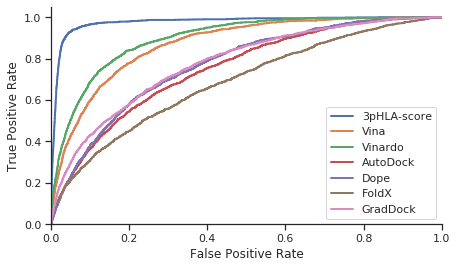

In [5]:

plt.figure()
lw = 2
for func, tmp in results.items():
    plt.plot(results[func]["fpr"], results[func]["tpr"],
             lw=lw, label=func)

#plt.plot([0, 1], [0, 1], label='random classifier', color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
sns.despine()
sns.set_style("ticks")

plt.savefig("./figures/fig2-AUROC.pdf")
plt.show()

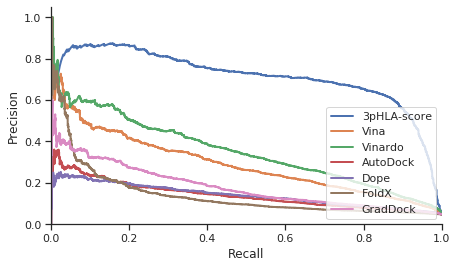

In [6]:
# plot AUPRC

plt.figure()
lw = 2
for func, tmp in results.items():
    plt.plot(results[func]["rec"], results[func]["prec"],
             lw=lw, label=func)
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right")
sns.despine()
sns.set_style("ticks")

plt.savefig("./figures/fig2-AUPRC.pdf")
plt.show()

## Violin per allele

3pHLA-score
A0101


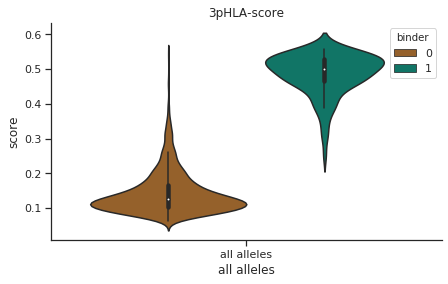

A0201


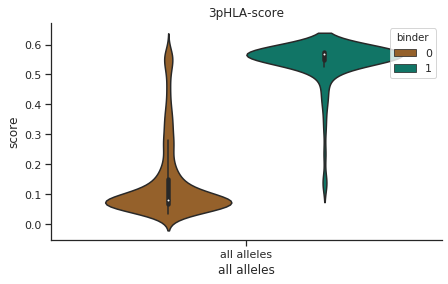

A0301


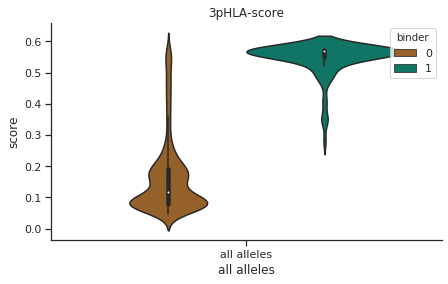

A1101


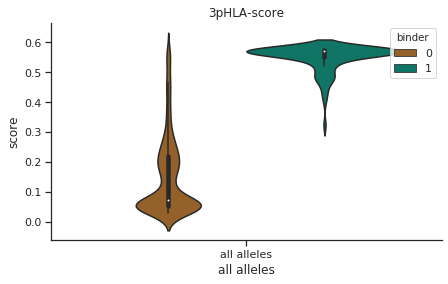

A2402


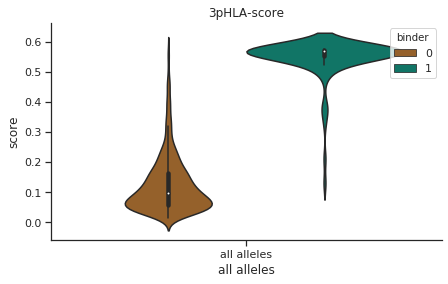

A2902


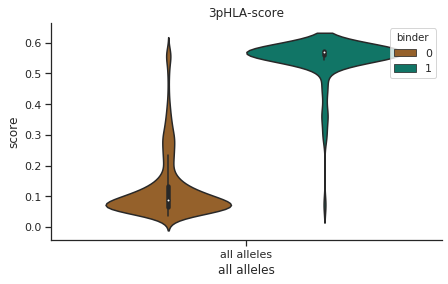

B0702


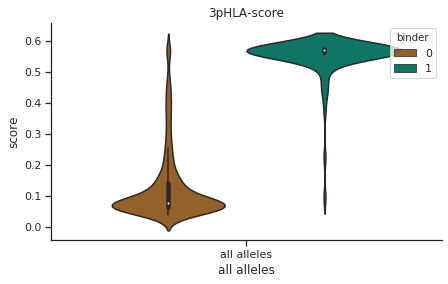

B0801


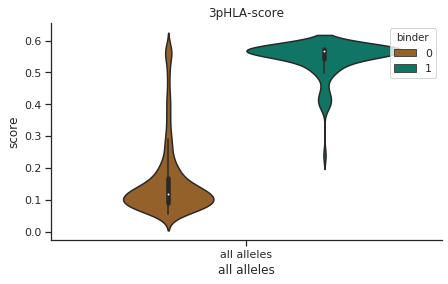

B1501


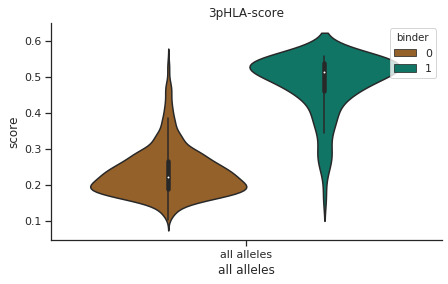

B2705


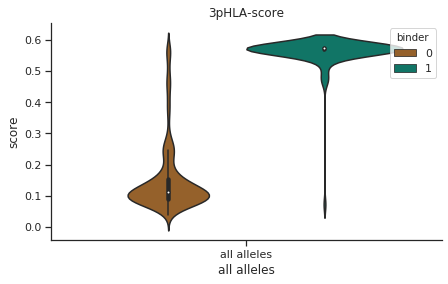

B3501


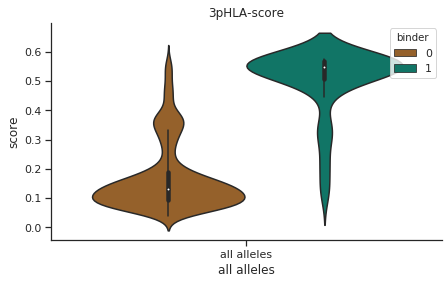

B4001


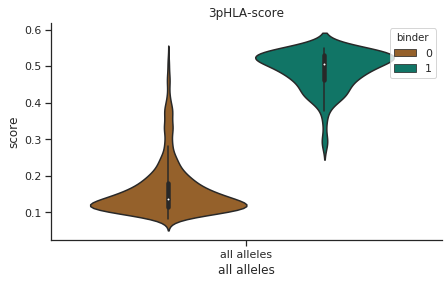

B4002


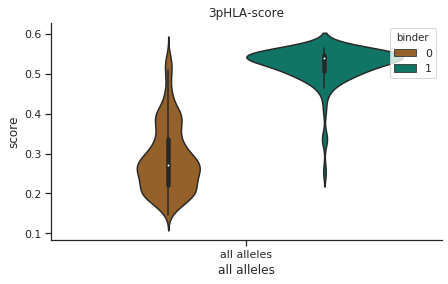

B4403


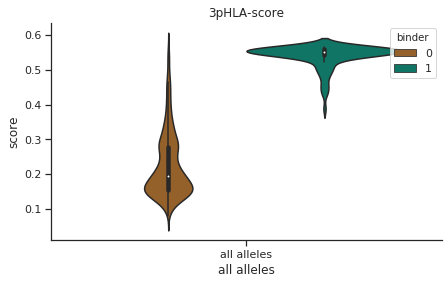

B5101


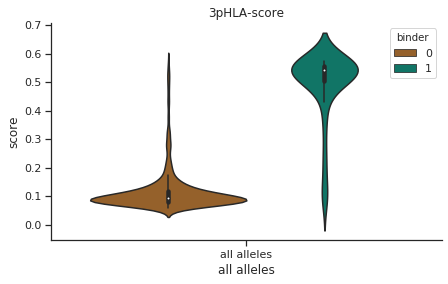

B5701


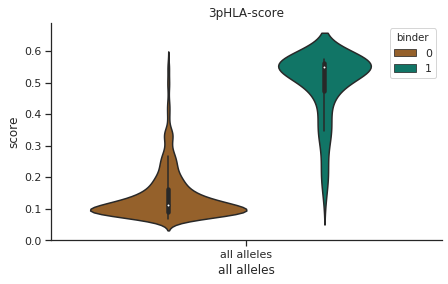

vina-score
A0101


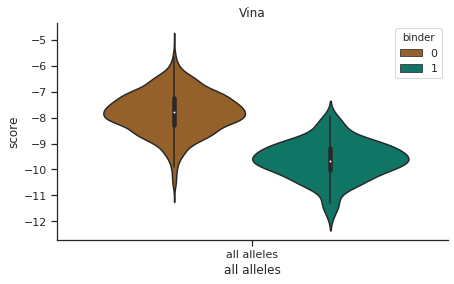

A0201


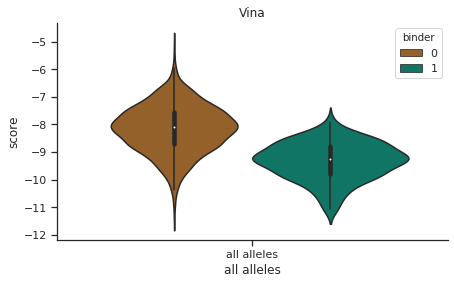

A0301


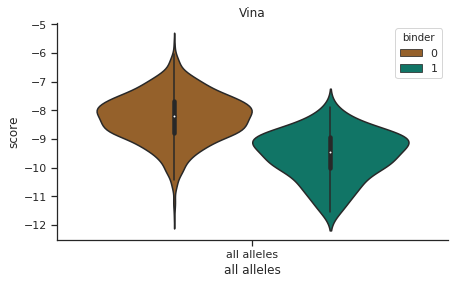

A1101


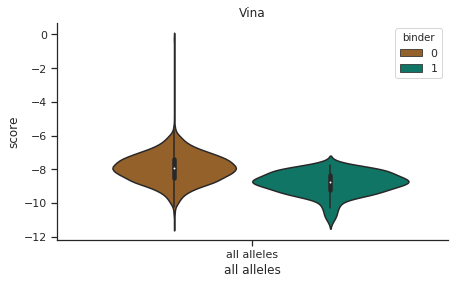

A2402


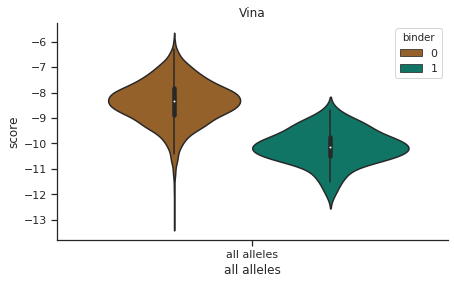

A2902


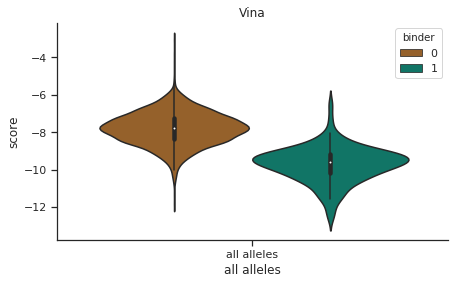

B0702


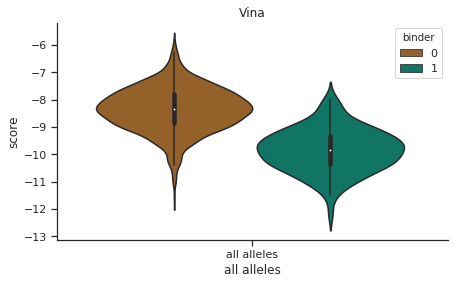

B0801


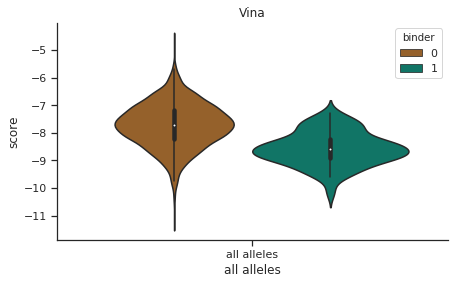

B1501


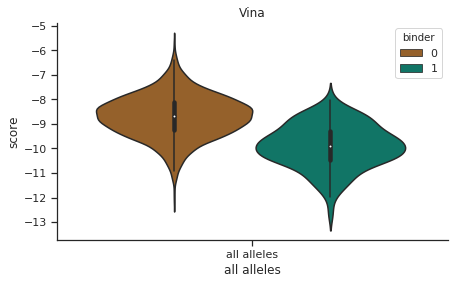

B2705


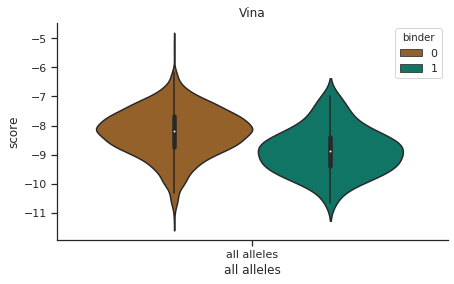

B3501


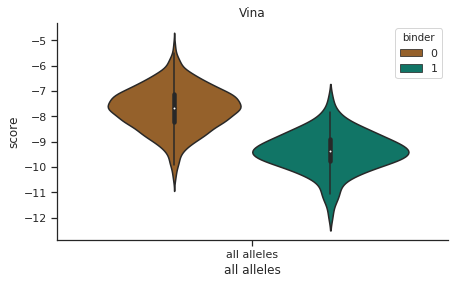

B4001


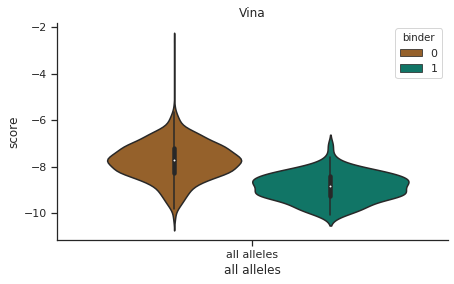

B4002


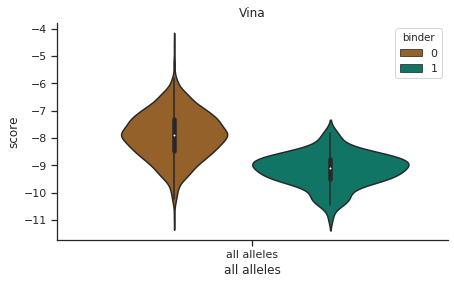

B4403


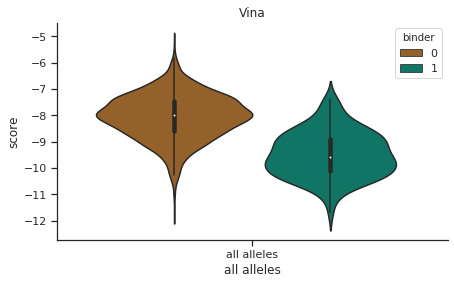

B5101


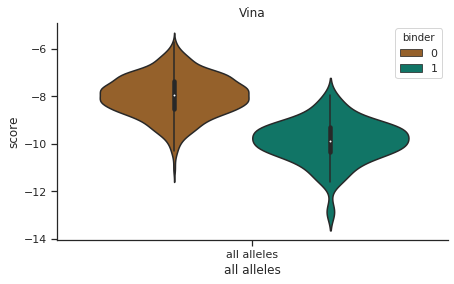

B5701


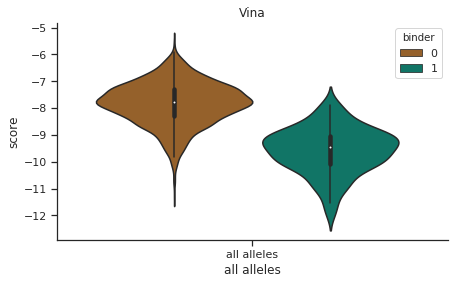

vinardo-score
A0101


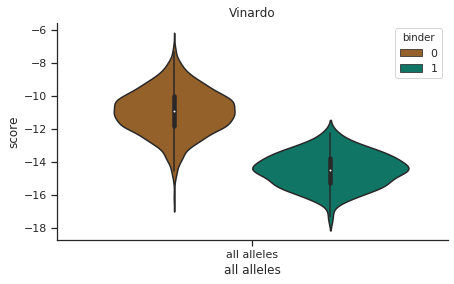

A0201


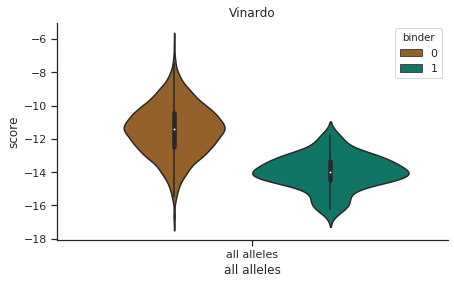

A0301


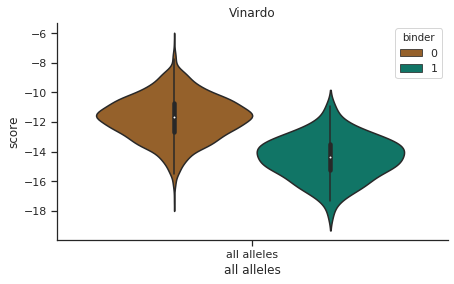

A1101


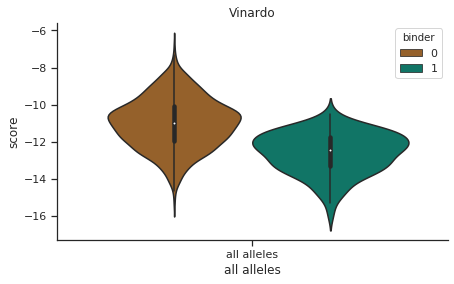

A2402


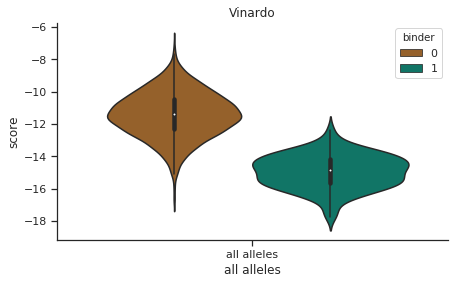

A2902


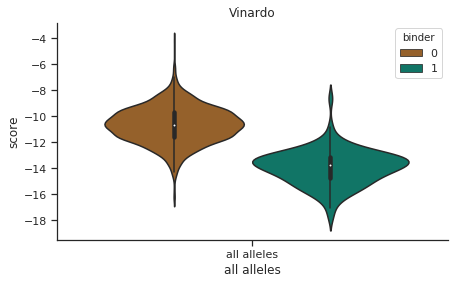

B0702


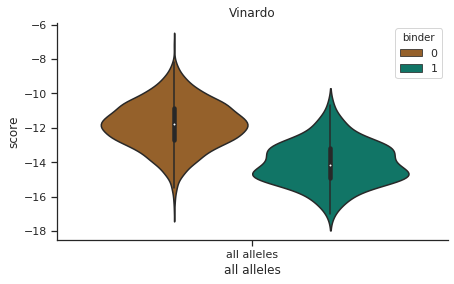

B0801


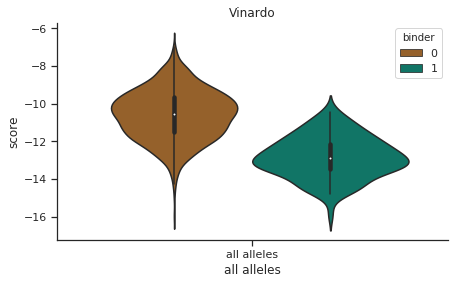

B1501


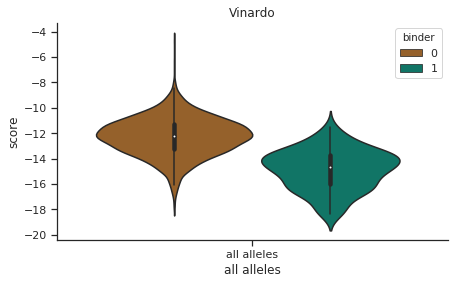

B2705


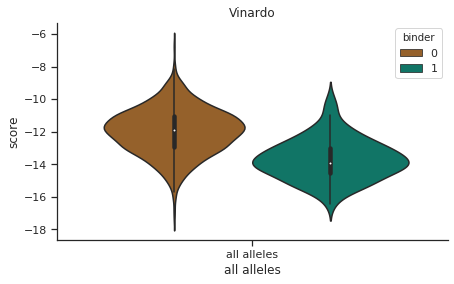

B3501


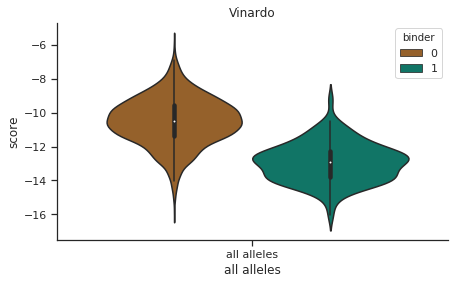

B4001


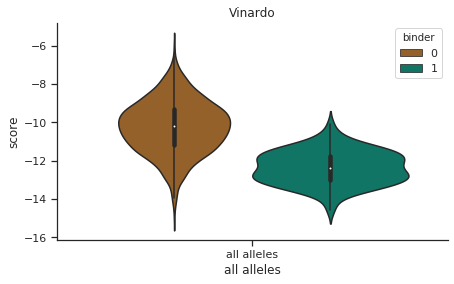

B4002


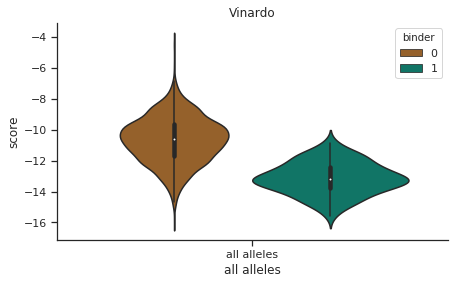

B4403


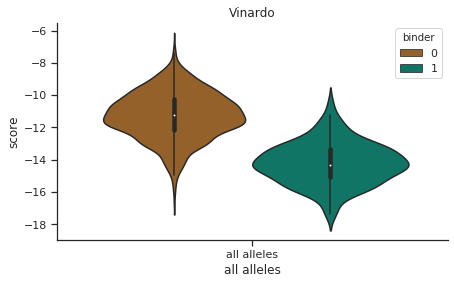

B5101


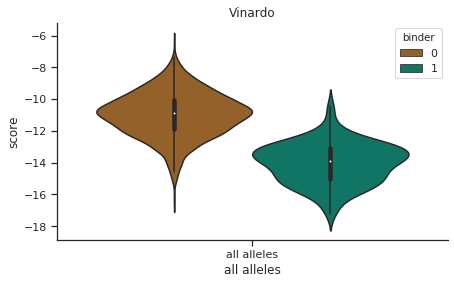

B5701


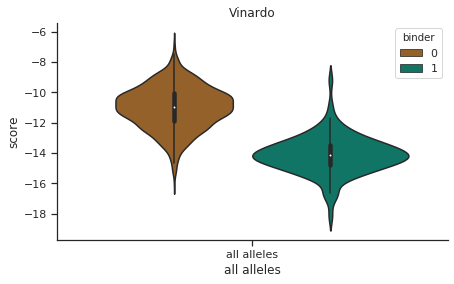

ad4_scoring-score
A0101


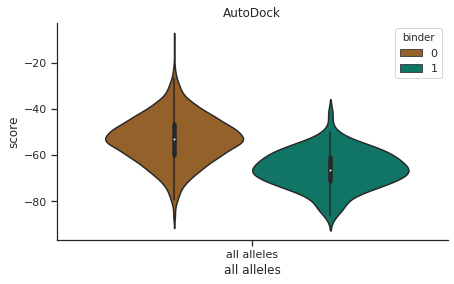

A0201


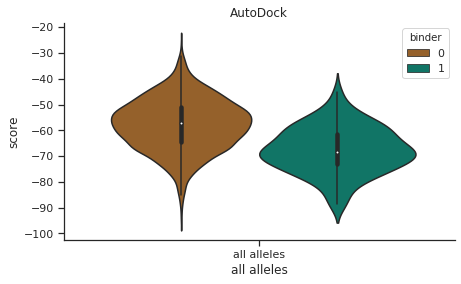

A0301


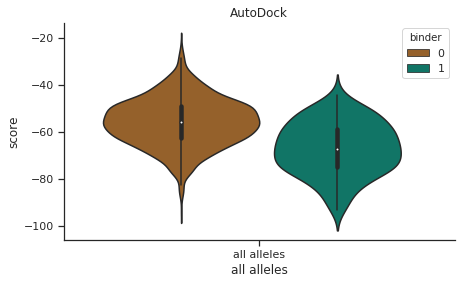

A1101


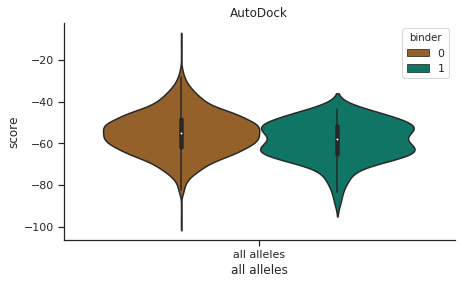

A2402


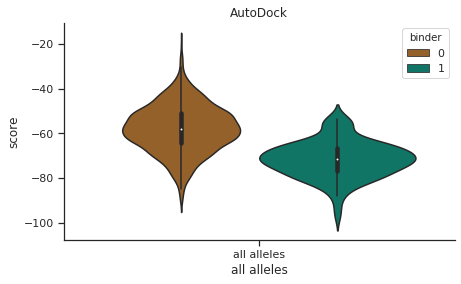

A2902


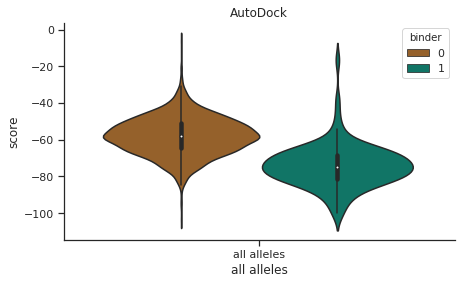

B0702


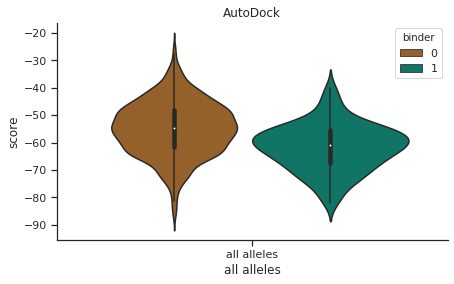

B0801


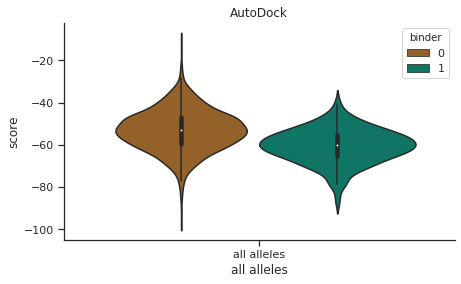

B1501


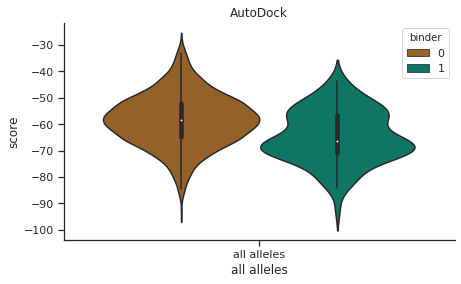

B2705


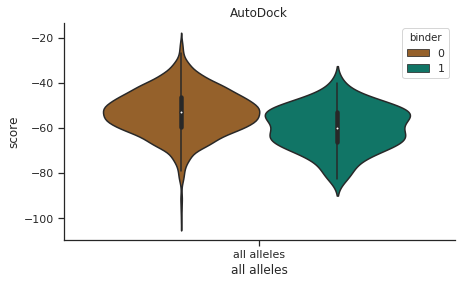

B3501


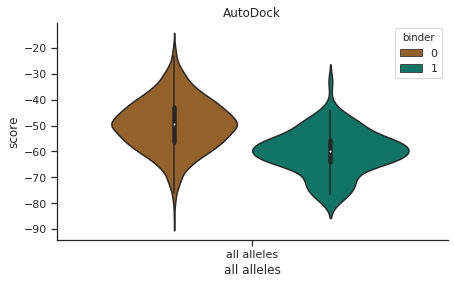

B4001


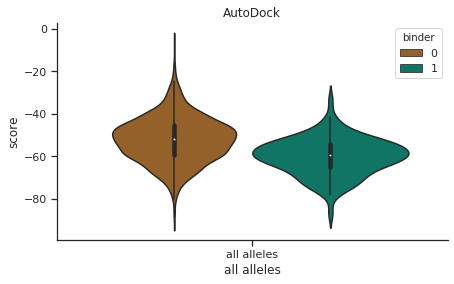

B4002


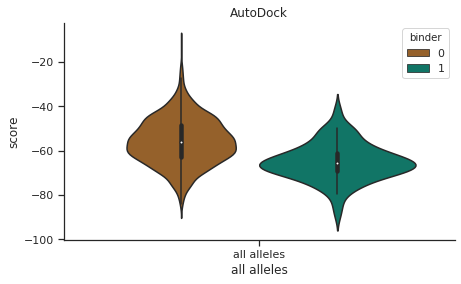

B4403


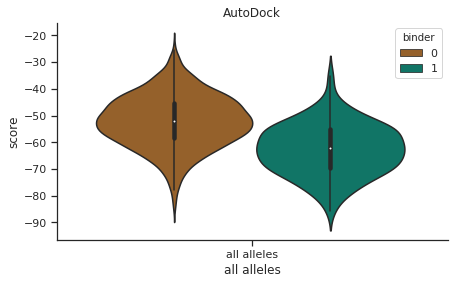

B5101


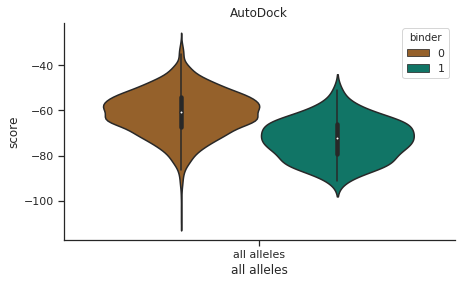

B5701


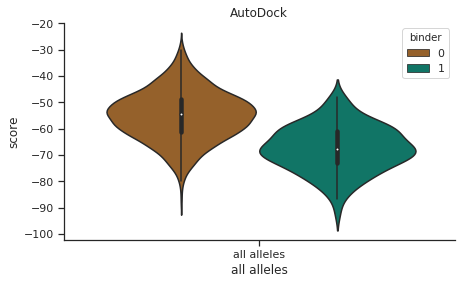

dope-score
A0101


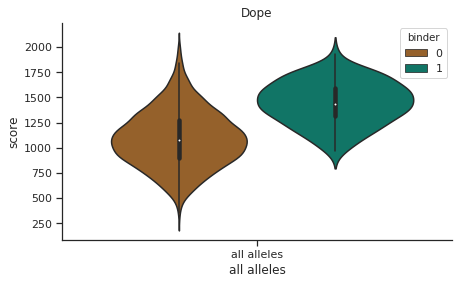

A0201


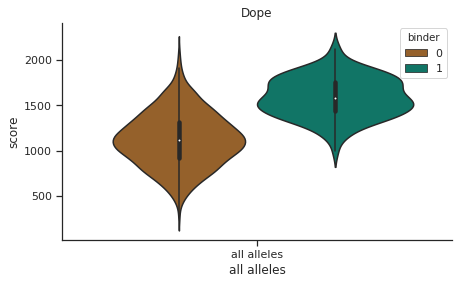

A0301


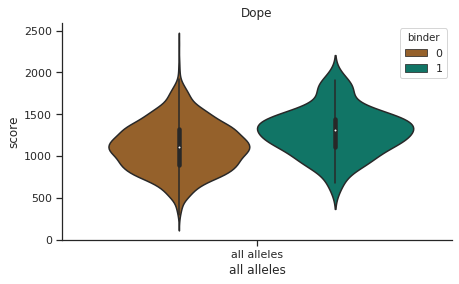

A1101


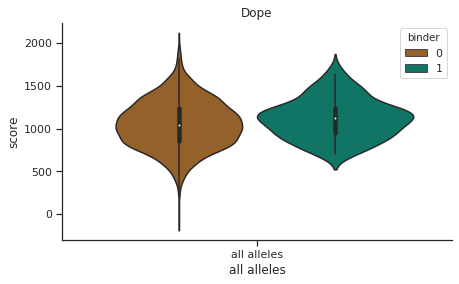

A2402


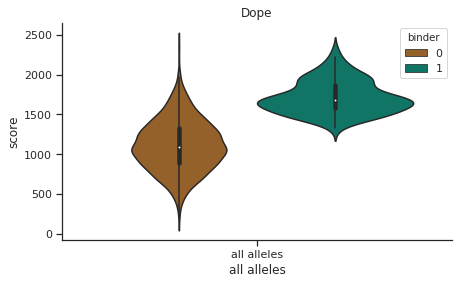

A2902


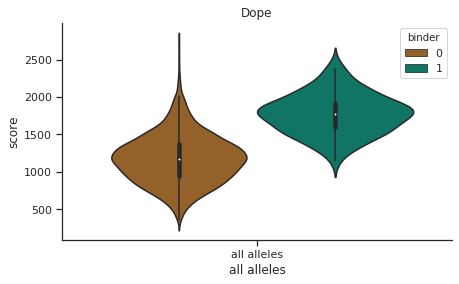

B0702


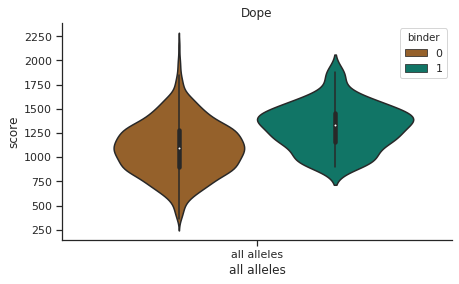

B0801


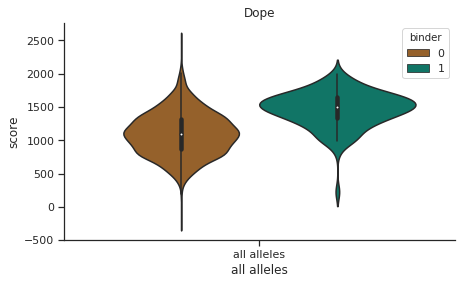

B1501


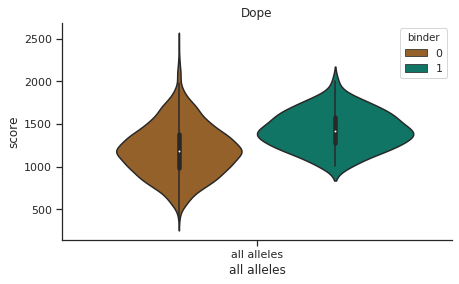

B2705


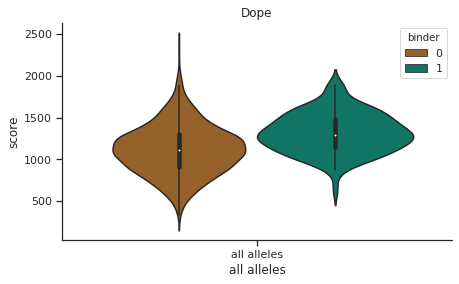

B3501


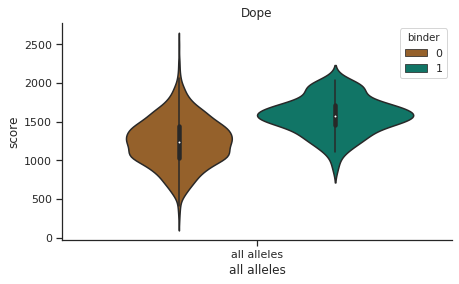

B4001


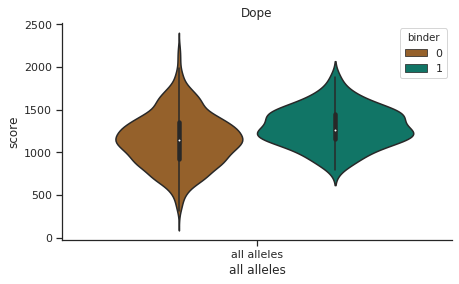

B4002


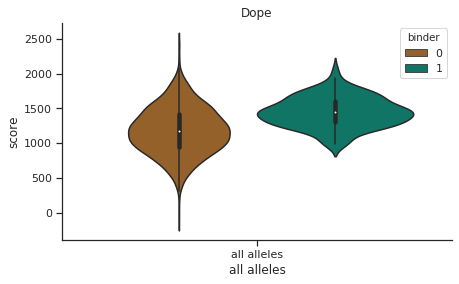

B4403


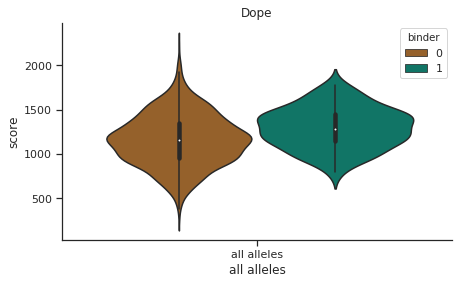

B5101


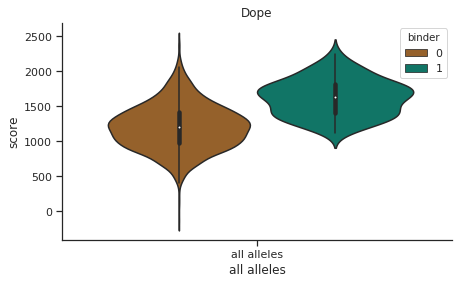

B5701


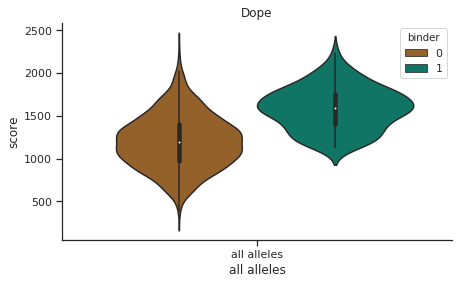

foldx-score
A0101


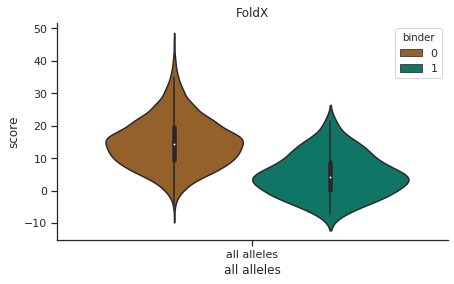

A0201


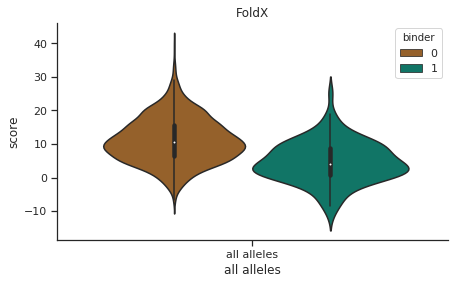

A0301


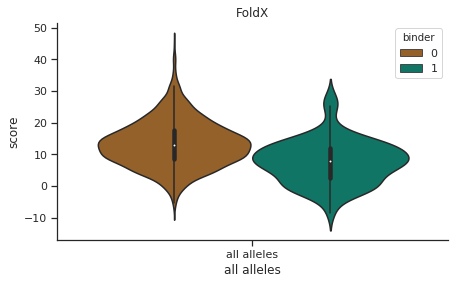

A1101


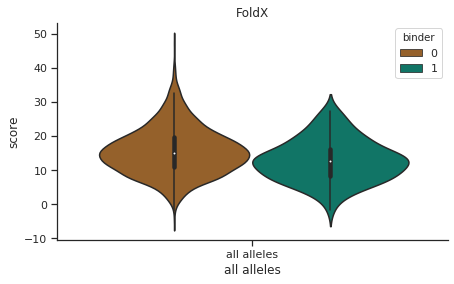

A2402


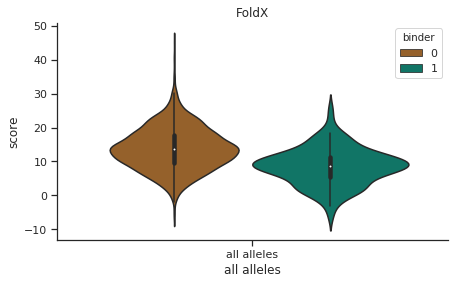

A2902


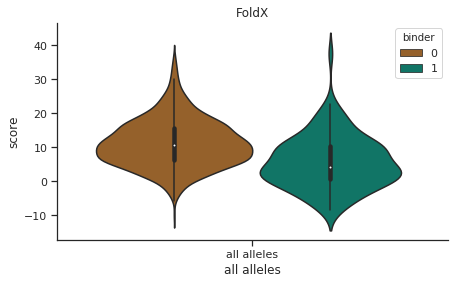

B0702


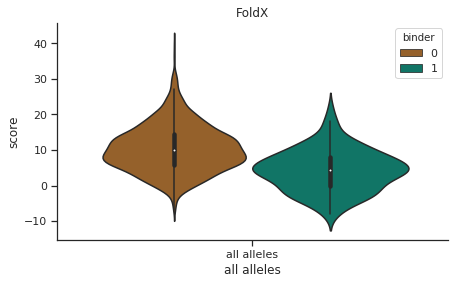

B0801


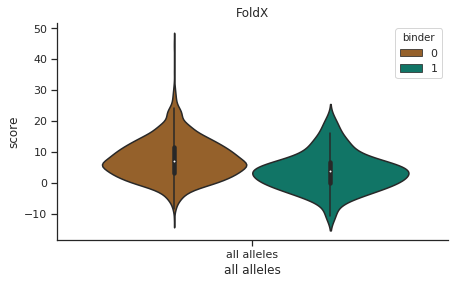

B1501


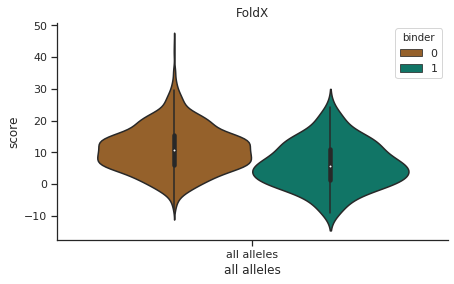

B2705


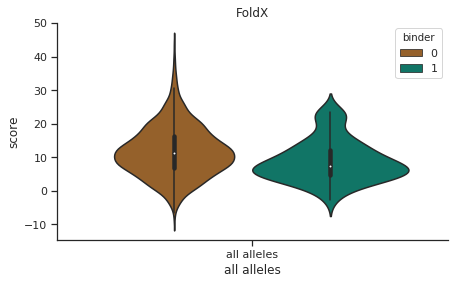

B3501


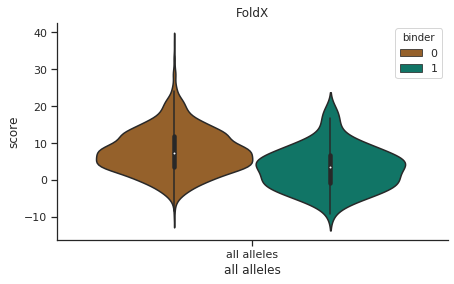

B4001


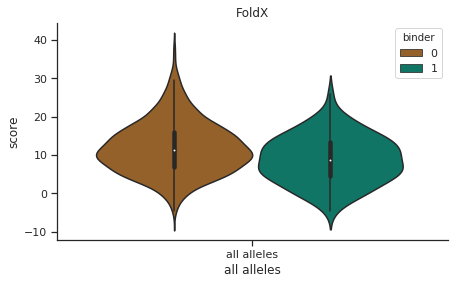

B4002


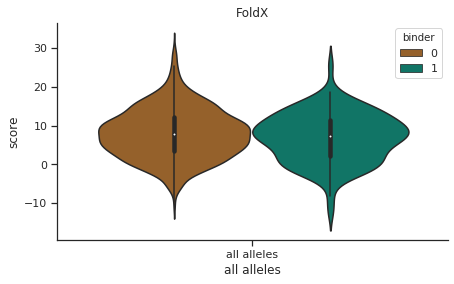

B4403


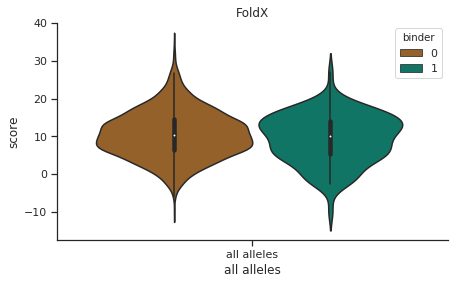

B5101


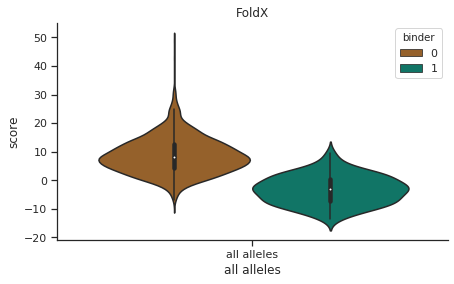

B5701


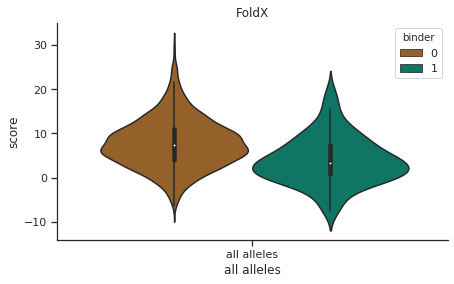

graddock-score
A0101


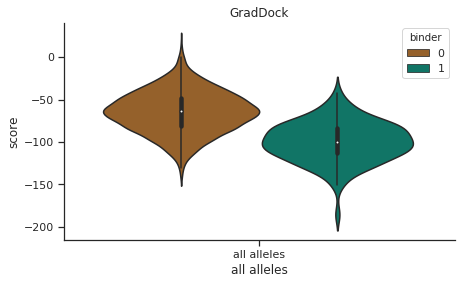

A0201


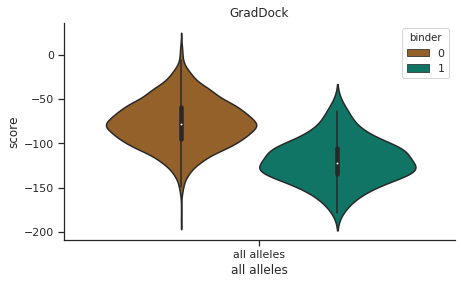

A0301


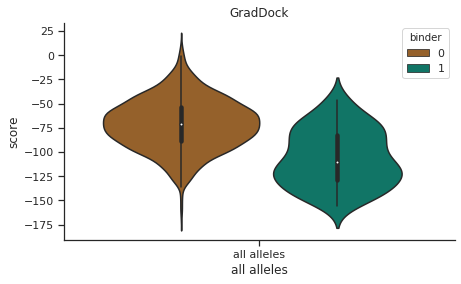

A1101


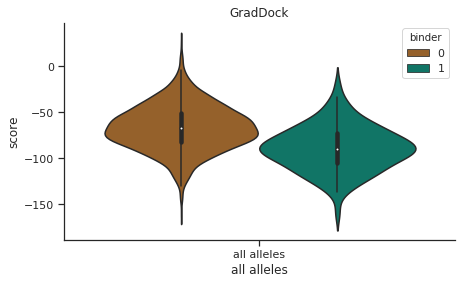

A2402


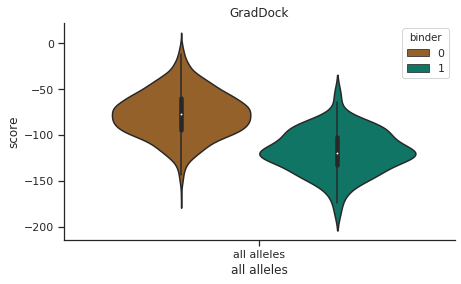

A2902


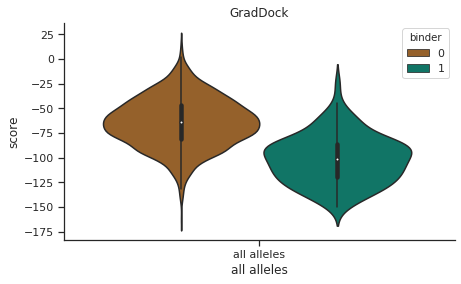

B0702


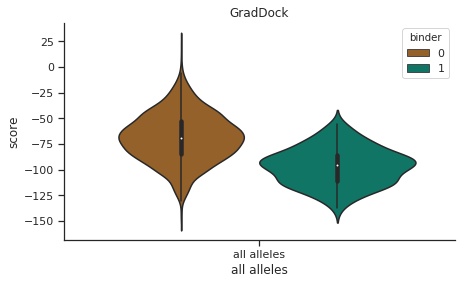

B0801


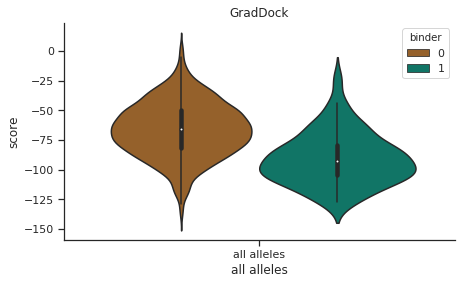

B1501


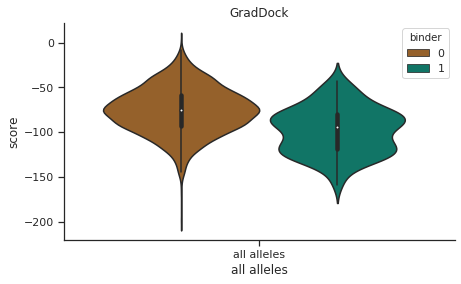

B2705


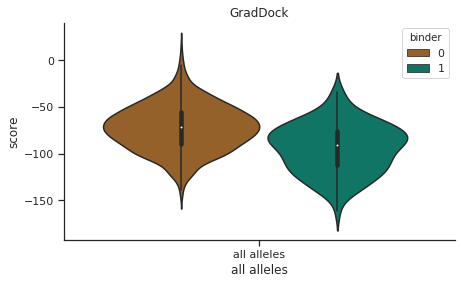

B3501


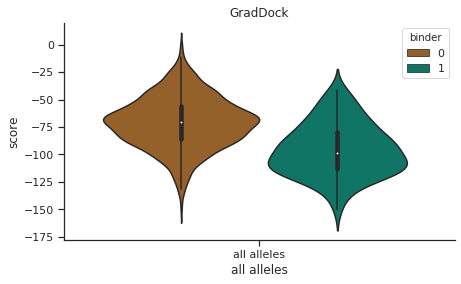

B4001


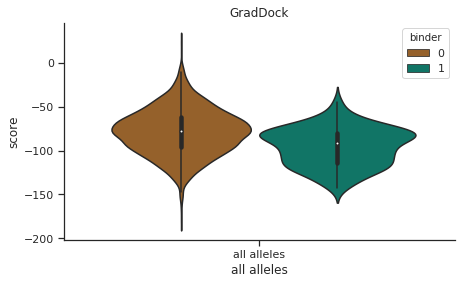

B4002


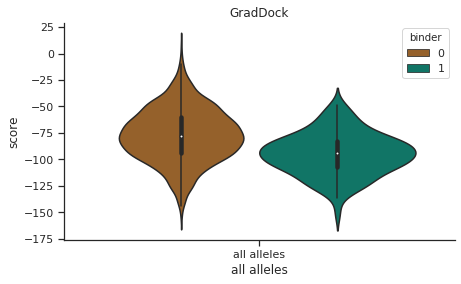

B4403


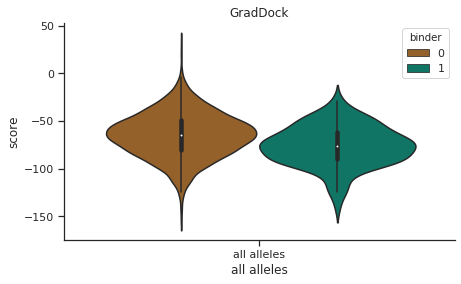

B5101


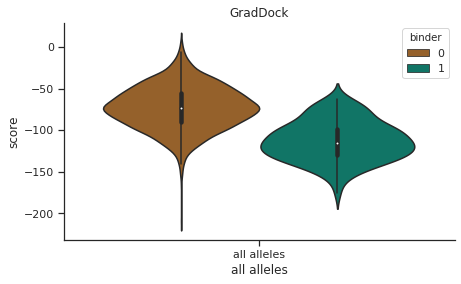

B5701


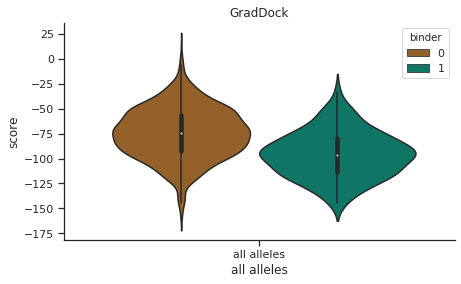

<Figure size 504x288 with 0 Axes>

In [157]:
alleles = res["allele"].unique()

for key, ba in enef_dict.items():
    print(ba)
    for allele in alleles:
        print(allele)
        
        res_tmp = res[res["allele"]==allele]
        #if not cutofs_dict[key] is None: df = df[df[ene]<=cutofs_dict[key]]
        sns.set(rc={"figure.figsize": (7,4), "font.family":"Areal"})
        sns.set_style("ticks")
        sns.despine()
        sns.set(rc={"font.family":"Areal"})
        sns.set_style("ticks")
        res_y = res[ba]
        if not cutofs_dict[ba] is None:
            res_y = res_y.apply(lambda x: x if x<cutofs_dict[ba] else float("nan"))
        ax = sns.violinplot(x="all alleles", y=res_y, hue="binder", data=res_tmp, palette={0:"#a6611a", 1:"#018571" })
        ax.set(title=key)
        sns.despine()

        sns.set_style("ticks")
        ax.set(ylabel='score', xlabel='all alleles')
        #plt.savefig("./figures/fig2-1-"+key+".pdf")
        plt.show()
        plt.clf()

### AUROC AUPRC per allele

In [158]:

results={}
for key, ba in enef_dict.items():
    func = key
    results[func]={}
    
    for allele in alleles:  
        res_al = res[res["allele"] == allele]
        if ba in ["dope-score", "3pHLA-score"]:    
            sf_pred = list(res_al[ba])
        else:
            sf_pred = list(-res_al[ba])
        y_true = list(res_al["binder"])
        fpr, tpr, _ =roc_curve(y_true, sf_pred)
        roc_auc = auc(fpr, tpr)
        results[func][allele]={}
        results[func][allele]["fpr"] = fpr
        results[func][allele]["tpr"] = tpr
        results[func][allele]["auc"] = roc_auc
        print("AUROC ("+func+", "+allele+") = "+str(roc_auc))
              
        prec, rec, _ =precision_recall_curve(y_true, sf_pred)
        ap = average_precision_score(y_true, sf_pred)
        auprc = auc(rec, prec)
        results[func][allele]["prec"] = prec
        results[func][allele]["rec"] = rec
        results[func][allele]["ap"] = ap
        print("AP score ("+func+", "+allele+") = "+str(ap))

AUROC (3pHLA-score, A0101) = 0.9978589294647323
AP score (3pHLA-score, A0101) = 0.9569768589998368
AUROC (3pHLA-score, A0201) = 0.977805
AP score (3pHLA-score, A0201) = 0.7156598115895931
AUROC (3pHLA-score, A0301) = 0.9834775
AP score (3pHLA-score, A0301) = 0.7409164824923765
AUROC (3pHLA-score, A1101) = 0.98658
AP score (3pHLA-score, A1101) = 0.7740230694780033
AUROC (3pHLA-score, A2402) = 0.9919469469469469
AP score (3pHLA-score, A2402) = 0.9196276010127666
AUROC (3pHLA-score, A2902) = 0.9860240360540811
AP score (3pHLA-score, A2902) = 0.8613736203258204
AUROC (3pHLA-score, B0702) = 0.9841320660330165
AP score (3pHLA-score, B0702) = 0.6950894089851768
AUROC (3pHLA-score, B0801) = 0.9799949974987494
AP score (3pHLA-score, B0801) = 0.6682741059134727
AUROC (3pHLA-score, B1501) = 0.9682932932932933
AP score (3pHLA-score, B1501) = 0.8001403745686562
AUROC (3pHLA-score, B2705) = 0.9836174999999999
AP score (3pHLA-score, B2705) = 0.8044365474717794
AUROC (3pHLA-score, B3501) = 0.954505
AP

AP score (GradDock, A1101) = 0.14011392604601364
AUROC (GradDock, A2402) = 0.8885860860860861
AP score (GradDock, A2402) = 0.3687623461396727
AUROC (GradDock, A2902) = 0.8562193289934902
AP score (GradDock, A2902) = 0.30612845043927356
AUROC (GradDock, B0702) = 0.8244947473736868
AP score (GradDock, B0702) = 0.17670063369124844
AUROC (GradDock, B0801) = 0.7875337668834418
AP score (GradDock, B0801) = 0.16477386695589902
AUROC (GradDock, B1501) = 0.7279429429429429
AP score (GradDock, B1501) = 0.13949301542645764
AUROC (GradDock, B2705) = 0.7217300000000001
AP score (GradDock, B2705) = 0.16854442833129918
AUROC (GradDock, B3501) = 0.774555
AP score (GradDock, B3501) = 0.17158945779446985
AUROC (GradDock, B4001) = 0.6901325662831415
AP score (GradDock, B4001) = 0.09153799922414163
AUROC (GradDock, B4002) = 0.7111055527763883
AP score (GradDock, B4002) = 0.0918075327544719
AUROC (GradDock, B4403) = 0.6450150075037518
AP score (GradDock, B4403) = 0.07736931789702581
AUROC (GradDock, B5101)

In [162]:
#AUROC

results_format = {}

results_format["allele"] = alleles
for key, ba in enef_dict.items():
    tmp = []
    for allele in alleles:
        tmp.append(results[key][allele]["auc"])
    results_format[key] = tmp

pd.DataFrame(results_format).style.highlight_max(color = 'bisque', axis=1)
#pd.DataFrame(results_format).to_latex("vs_auroc_sup.tex")

,allele,3pHLA-score,Vina,Vinardo,AutoDock,Dope,FoldX,GradDock
0,A0101,0.997859,0.953229,0.979900,0.845758,0.843517,0.844652,0.851253
1,A0201,0.977805,0.860607,0.914830,0.771790,0.893805,0.763165,0.877715
2,A0301,0.983478,0.872490,0.907125,0.767695,0.670895,0.719420,0.806323
3,A1101,0.986580,0.799687,0.819128,0.595910,0.569345,0.613045,0.747380
4,A2402,0.991947,0.948178,0.977718,0.850310,0.943699,0.738318,0.888586
5,A2902,0.986024,0.939271,0.958358,0.878182,0.921928,0.715233,0.856219
6,B0702,0.984132,0.910110,0.887766,0.701091,0.730810,0.757989,0.824495
7,B0801,0.979995,0.799905,0.895650,0.720445,0.817349,0.676633,0.787534
8,B1501,0.968293,0.841742,0.888293,0.673023,0.739590,0.686241,0.727943
9,B2705,0.983617,0.721595,0.822185,0.692447,0.706670,0.622695,0.721730


In [164]:
#AUROC

results_format = {}


results_format["allele"] = alleles
for key, ba in enef_dict.items():
    tmp = []
    for allele in alleles:
        tmp.append(results[key][allele]["ap"])
    results_format[key] = tmp

pd.DataFrame(results_format).style.highlight_max(color = 'bisque', axis=1)
#pd.DataFrame(results_format).to_latex("vs_auprc_sup.tex")

,allele,3pHLA-score,Vina,Vinardo,AutoDock,Dope,FoldX,GradDock
0,A0101,0.956977,0.523399,0.690218,0.192611,0.181234,0.337905,0.290420
1,A0201,0.715660,0.205126,0.298295,0.142011,0.285571,0.183424,0.357065
2,A0301,0.740916,0.277324,0.412307,0.202703,0.091861,0.146112,0.290163
3,A1101,0.774023,0.157361,0.189710,0.072240,0.055838,0.073304,0.140114
4,A2402,0.919628,0.422715,0.670886,0.206803,0.397063,0.132031,0.368762
5,A2902,0.861374,0.523034,0.598588,0.347429,0.348952,0.180041,0.306128
6,B0702,0.695089,0.376450,0.346057,0.091574,0.104016,0.197584,0.176701
7,B0801,0.668274,0.140807,0.354462,0.100157,0.158445,0.110397,0.164774
8,B1501,0.800140,0.257857,0.372958,0.099685,0.093826,0.139662,0.139493
9,B2705,0.804437,0.105399,0.186082,0.100384,0.087655,0.064670,0.168544
